# Task 2

### 1️ Import Libraries & Load Dataset

In [20]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
lor=LogisticRegressionCV()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
df= pd.read_csv("C:\Dataset\Task 5.csv")

In [22]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### 2️ Rename Columns

In [23]:
df.columns = [
    "Region",
    "Date",
    "Frequency",
    "Unemployment_Rate",
    "Employed",
    "Labour_Participation_Rate",
    "Area"
]

### 3️ Convert Date Column

In [24]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


### 4️ Basic Data Check

In [25]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment_Rate          740 non-null    float64       
 4   Employed                   740 non-null    float64       
 5   Labour_Participation_Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


,Date,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


### 5️ Overall Unemployment Trend

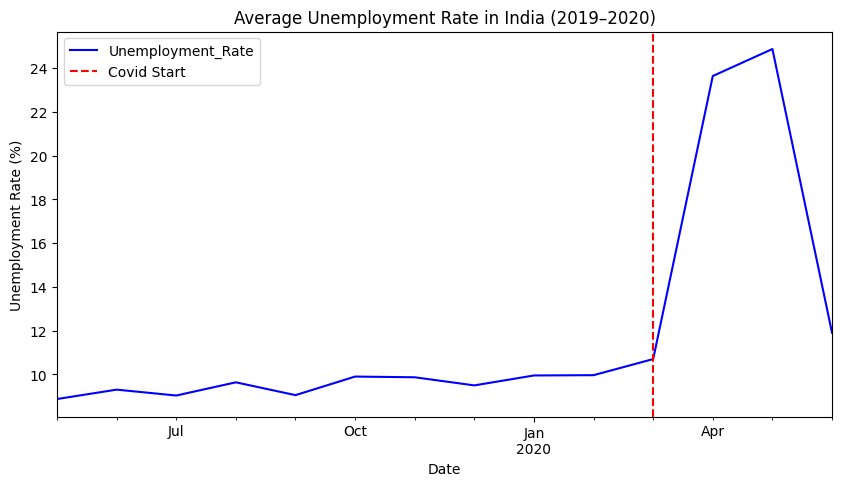

In [26]:
monthly_avg = df.groupby("Date")["Unemployment_Rate"].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(color="blue")
plt.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="Covid Start")
plt.title("Average Unemployment Rate in India (2019–2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


### 6️ State-wise Unemployment During Covid

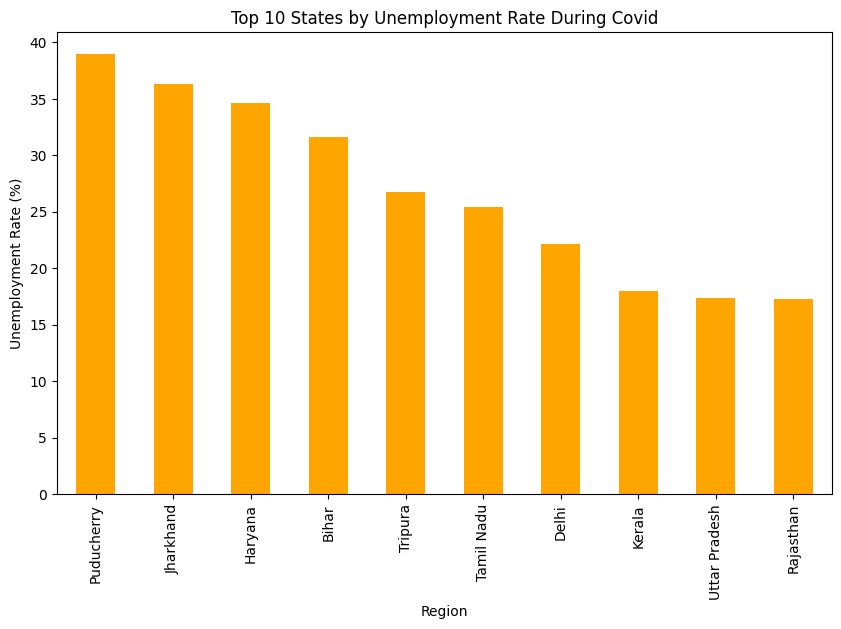

In [27]:
covid_df = df[df["Date"] >= "2020-03-01"]

state_avg = covid_df.groupby("Region")["Unemployment_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_avg.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 States by Unemployment Rate During Covid")
plt.ylabel("Unemployment Rate (%)")
plt.show()


### 7️ Rural vs Urban Comparison

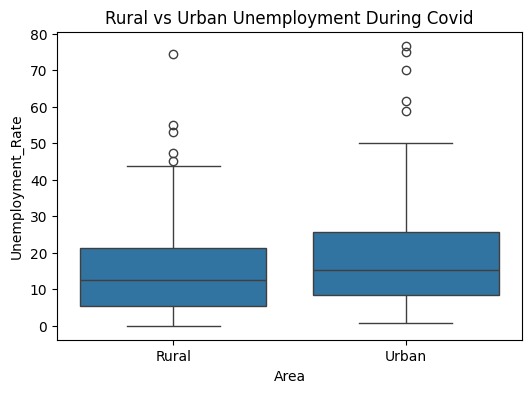

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Area", y="Unemployment_Rate", data=covid_df)
plt.title("Rural vs Urban Unemployment During Covid")
plt.show()


### 8️ Labour Participation vs Unemployment

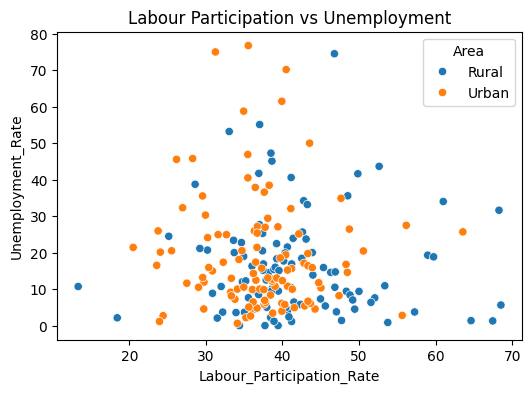

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Labour_Participation_Rate",
    y="Unemployment_Rate",
    hue="Area",
    data=covid_df
)
plt.title("Labour Participation vs Unemployment")
plt.show()


### 9️ Pre-Covid vs Covid Comparison

In [30]:
pre_covid = df[df["Date"] < "2020-03-01"]["Unemployment_Rate"].mean()
during_covid = df[df["Date"] >= "2020-03-01"]["Unemployment_Rate"].mean()

print("Average Unemployment Rate:")
print("Pre-Covid:", round(pre_covid, 2))
print("During Covid:", round(during_covid, 2))


Average Unemployment Rate:
Pre-Covid: 9.51
During Covid: 17.77


### 10 Conclusion

#### This project analyzed unemployment trends in India before and during the Covid-19 pandemic. The results reveal a dramatic increase in unemployment during lockdown months, with significant regional disparities. A sharp decline in labour participation further highlights the economic distress caused by the pandemic. These insights can assist policymakers in planning employment recovery strategies.